Name: Surbhi Khatri, Github: surbhikhatri, USC ID: 9893833133

(a) Download the Combined Cycle Power Plant data
from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [307]:
import pandas as pd
import openpyxl
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

In [308]:
data = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
print("i. Total Rows", len(data))
print("i. Total Columns", len(data.columns))
print("i. Column Names :", data.columns)

i. Total Rows 9568
i. Total Columns 5
i. Column Names : Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


ii. Make pairwise scatter plots of all the variables in the data set including the predictors (independent variables
with the dependent variable. Describe your findings.

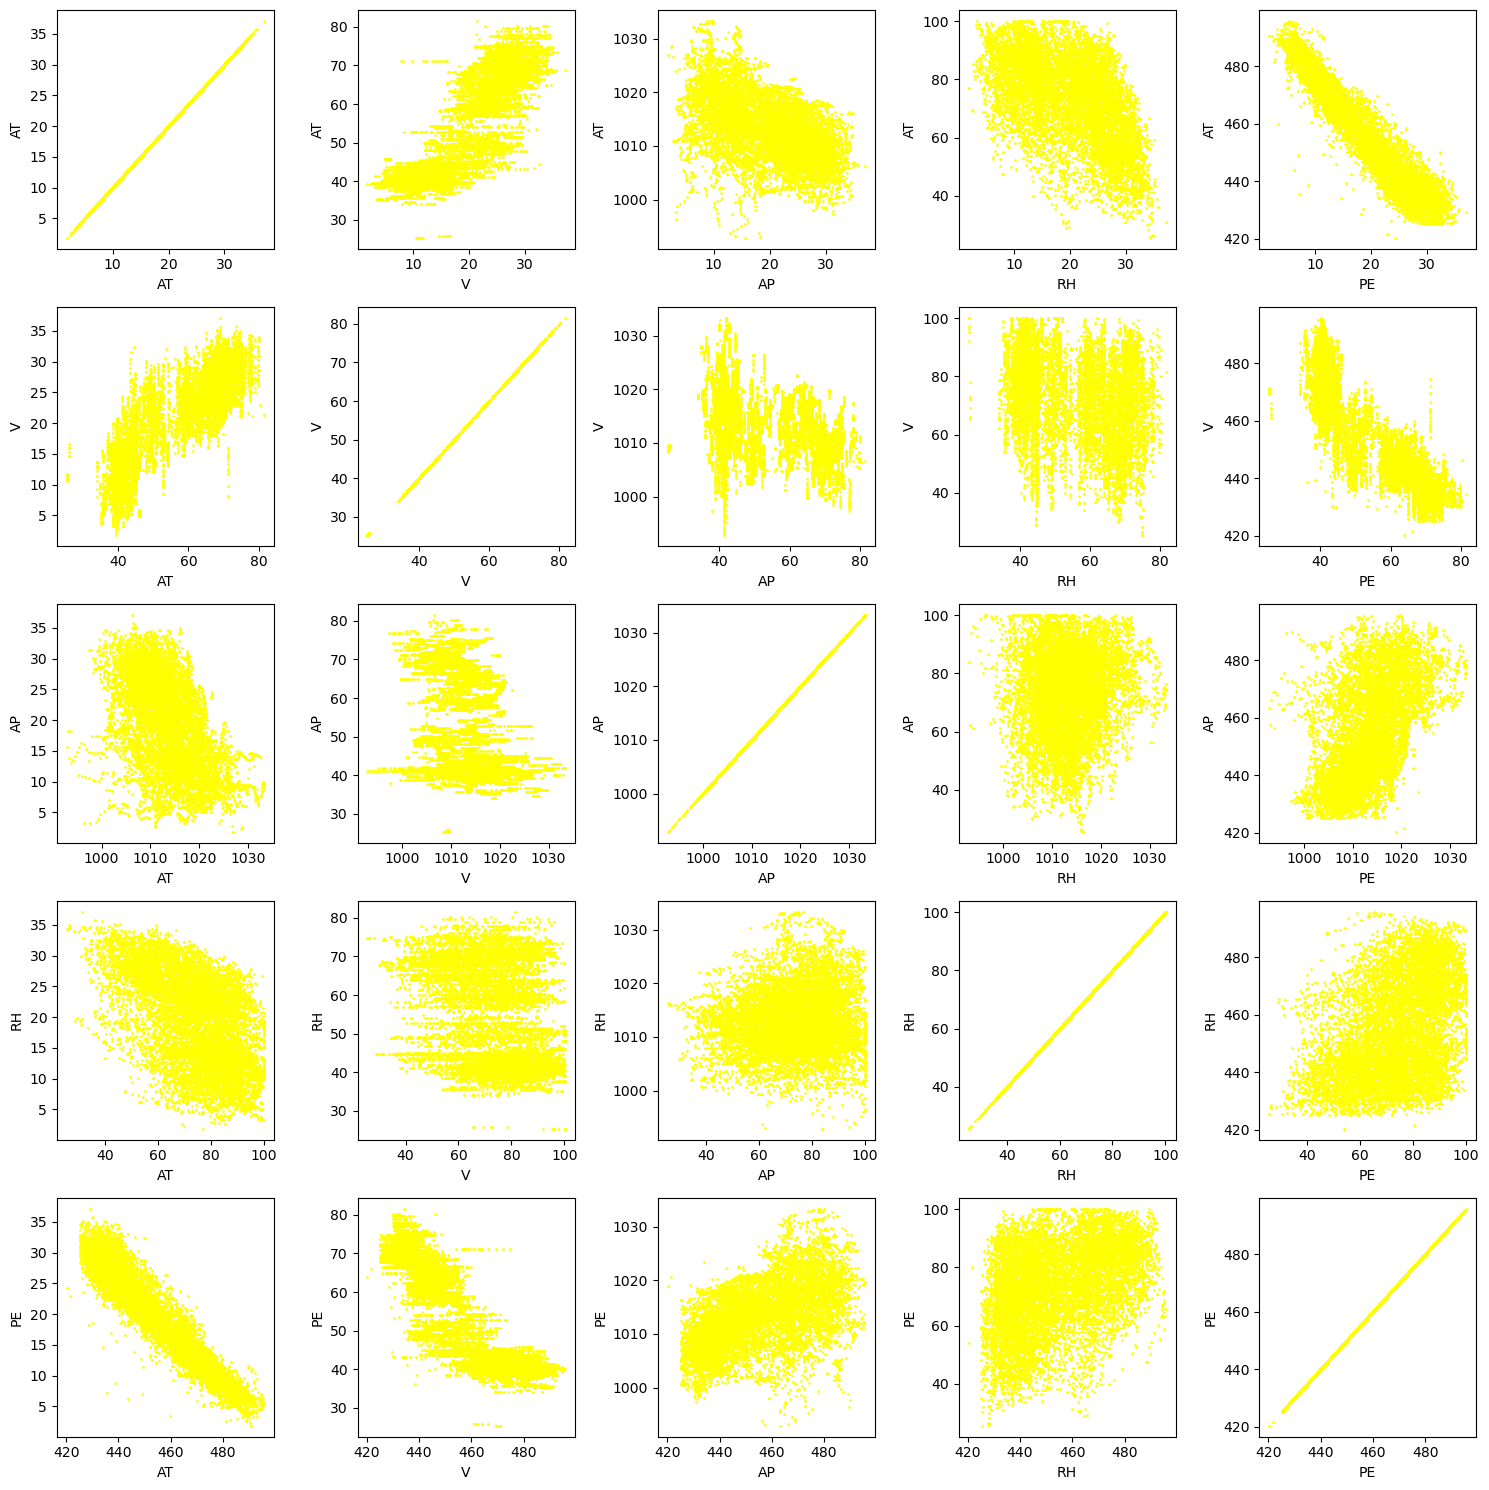

In [309]:
# ii
variables = data.columns
fig, ax = plt.subplots(5, 5, figsize=(15,15))

# 1:1 plots for each variable
for i in range(len(variables)):
    for j in range(len(variables)):
        ax[i, j].scatter(data[variables[i]], data[variables[j]], s=1, c='yellow')
        ax[i, j].set_ylabel(variables[i])
        ax[i, j].set_xlabel(variables[j])

plt.tight_layout()
plt.show()

iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table.

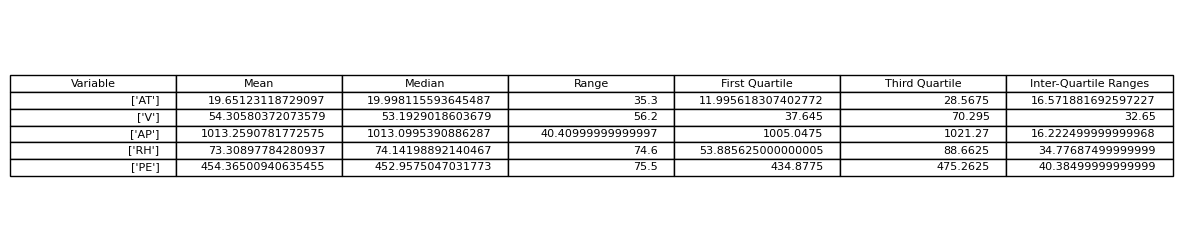

In [310]:
cellText = []

for i in range(len(variables)):
    # pandas method to give all the statistics of the data
    stats = data[variables[i]].describe()
    # cellText for adding the data in table
    cellText.append(
        [[variables[i]],
         np.mean(data[variables[i]]),
         stats.median(),
         np.max(data[variables[i]]) - np.min(data[variables[i]]),
         stats.quantile(.25),
         stats.quantile(.75),
         stats.quantile(.75) - stats.quantile(.25)])

fig, ax = plt.subplots(figsize=(15,3))
ax.axis('off')
# ax.axis('tight')

table = ax.table(cellText = cellText,
                 colLabels=["Variable", "Mean", "Median", "Range", "First Quartile", "Third Quartile", "Inter-Quartile Ranges"], loc='center')
plt.show()

c.  For each predictor, fit a simple linear regression model to predict the response.
    Describe your results. In which of the models is there a statistically significant
    association between the predictor and the response? Create some plots to back
    up your assertions. Are there any outliers that you would like to remove from
    your data for each of these regression tasks

AT : P value is : 0.0
V : P value is : 0.0
AP : P value is : 0.0
RH : P value is : 0.0
Since the p values for all the variables is 0 and small, it indicates we have strong association and we can reject the null hypothesis of these variables not being associated with Y 


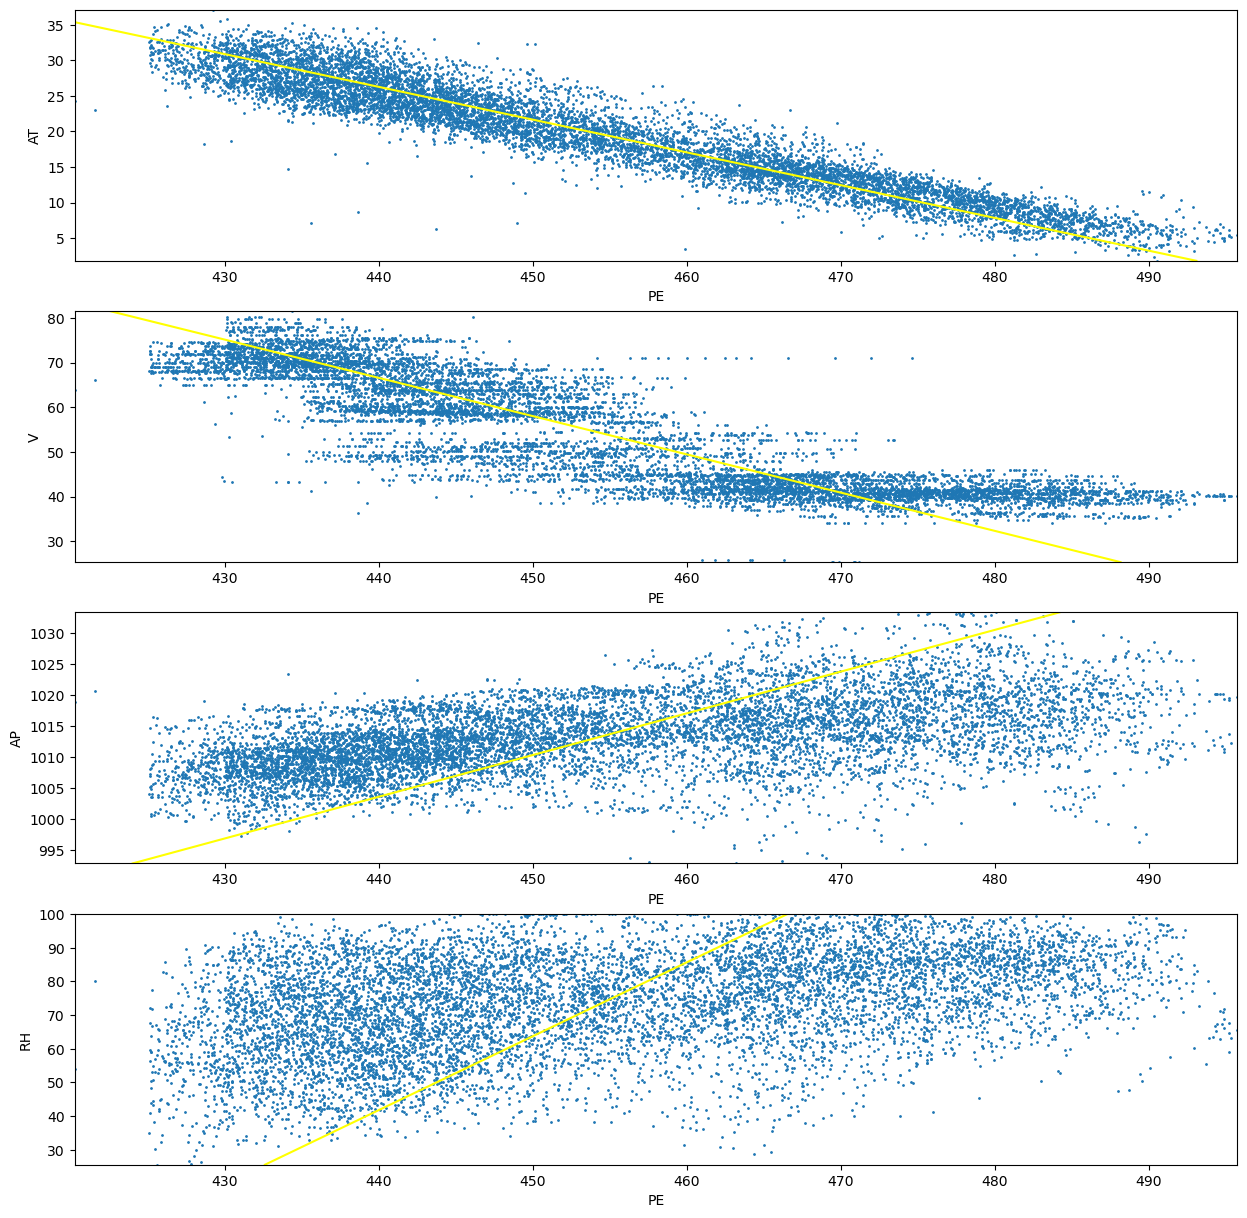

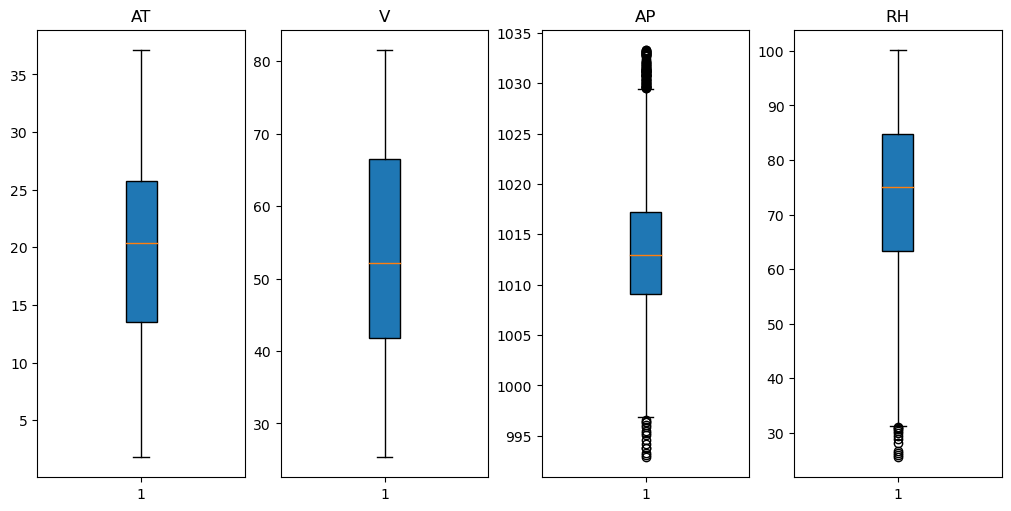

Yes, since we are able to detect outliers for the variables AP and RH, which depicts the data points which are at a distance greater than 1.5*IQR on both sides


In [311]:
fig, ax = plt.subplots(4,figsize=(15,15))
uni_coefficient = []

for i in range (len(variables)-1):
    # add intercept terms
    X = sm.add_constant(data[variables[i]])

    # variables[4] = Y (to be predicted)
    model = sm.OLS(data[variables[4]], X).fit()

    # uni-variate coefficient for 1e
    uni_coefficient.append(model.params[1])

    # params[0] -> intercept when all ind variables are 0, beta0
    # params[1] -> x_coefficient beta1
    # two point to make a line (y, 0) and (0, x)
    ax[i].set_ylabel(variables[i])
    ax[i].set_xlabel(variables[4])

    ax[i].axline([model.params[0], 0], [0, -model.params[0]/model.params[1]], color="yellow")
    ax[i].scatter(data[variables[-1]], data[variables[i]], s=1)

    ax[i].set_xlim([min(data[variables[-1]]), max(data[variables[-1]])])
    ax[i].set_ylim([min(data[variables[i]]), max(data[variables[i]])])

    print(variables[i], ": P value is :", model.pvalues[1])

print("Since the p values for all the variables is 0 and small, it indicates we have strong association and we can reject the null hypothesis of these variables not being associated with Y ")
plt.show()

fig, ax = plt.subplots(1, 4, constrained_layout=True, figsize=(10, 5))
for i in range(4):
    ax[i].boxplot(data[variables[i]], patch_artist=True)
    ax[i].set_title(variables[i])
plt.show()

print("Yes, since we are able to detect outliers for the variables AP and RH, which depicts the data points which are at a distance greater than 1.5*IQR on both sides")


d.  Fit a multiple regression model to predict the response using all of the predictors.
    Describe your results. For which predictors can we reject the null hypothesis H0: βj = 0

In [312]:
# multiple regression -> use all the variables
X = sm.add_constant(data.drop(['PE'], axis=1))
model = sm.OLS(data[variables[4]], X).fit()
# for 1e
multi_coefficient = model.params[1:]
print(model.summary())

print()
print("The t-value measures how many standard errors the coefficient estimate is away from zero. Large t-value indicates a stronger relationship between the independent variable and the dependent variable. We can safely reject the null hypothesis for all the predictors")

print()
print("Also, ss indicated in the summary the P values are close to 0 and hence indicating all the independent variables have a relationship with Y hence we can reject the null hypothesis for all the variables")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:48:01   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

e.  How do your results from 1c compare to your results from 1d? Create a plot
    displaying the univariate regression coefficients from 1c on the x-axis, and the
    multiple regression coefficients from 1d on the y-axis. That is, each predictor is
    displayed as a single point in the plot. Its coefficient in a simple linear regression
    model is shown on the x-axis, and its coefficient estimate in the multiple linear
    regression model is shown on the y-axis

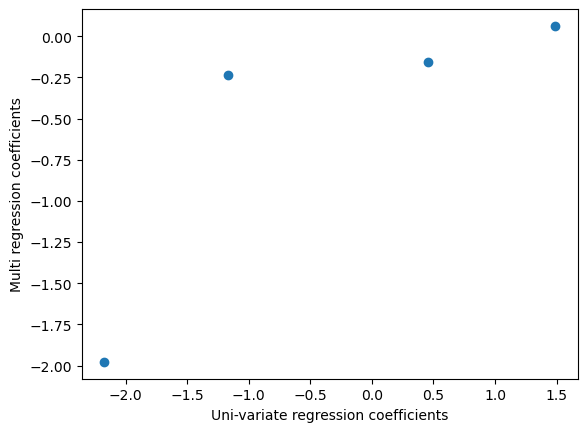

In [313]:
# linear regression coefficient -> x axis
# multi regression coefficient -> y axis
plt.scatter(uni_coefficient, multi_coefficient)
plt.xlabel("Uni-variate regression coefficients")
plt.ylabel("Multi regression coefficients")
plt.show()

f.  Is there evidence of nonlinear association between any of the predictors and the
    response? To answer this question, for each predictor X, fit a model of the form
    Y = β0 + β1 * X + β2 * X^2 + β3 * X^3 + E

p values for AT  X: 7.898147235496452e-07 , X^2:  8.833047456323243e-73 , X^3: 3.652184573520579e-110
p values for V  X: 2.526589029381063e-05 , X^2:  0.768497196483112 , X^3: 0.013734885913611368
p values for AP  X: 4.5027289386866634e-17 , X^2:  3.6666984772387646e-17 , X^3: 8.264119728429606e-18
p values for RH  X: 0.0003772509912673817 , X^2:  9.39542633724523e-06 , X^3: 1.4402785089625355e-05


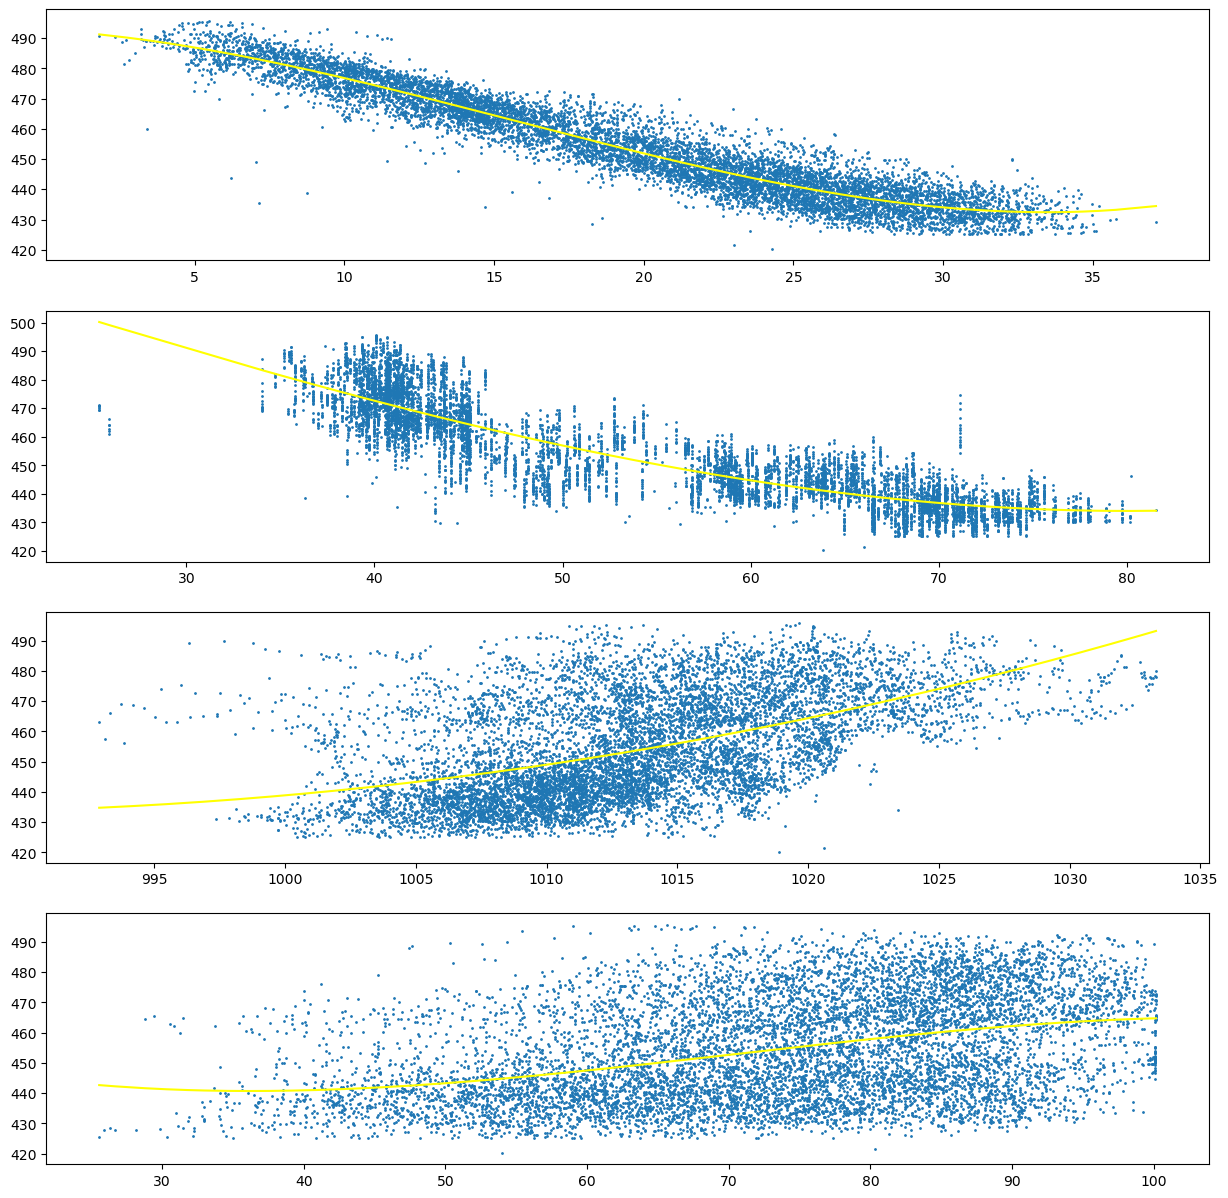

Here only the p-value of V^2 is very high, that's why we can't reject the null hypothesis for V but can be reject for rest of the variables


In [314]:
import numpy as np
fig, ax = plt.subplots(4, figsize=(15,15))
poly_features = PolynomialFeatures(degree=3)

for i in range(len(variables)-1):
    x_poly = poly_features.fit_transform(sm.add_constant(data[variables[i]]))

    model = sm.OLS(data[variables[4]], x_poly).fit()
    y_pred = model.predict(x_poly)

    # for better visualization
    order = np.argsort(data[variables[i]])
    ys = np.array(y_pred)[order]
    xs = np.array(data[variables[i]])[order]

    # plot all the data points
    ax[i].scatter(data[variables[i]], data[variables[4]], s=1)

    # plot the target variable wrt the predicted value
    ax[i].plot(xs, ys, color='yellow')

    # explains non-linear relationship
    print("p values for", variables[i], " X:", model.pvalues[7], ", X^2: ", model.pvalues[8], ", X^3:", model.pvalues[9])
plt.show()

print("Here only the p-value of V^2 is very high, that's why we can't reject the null hypothesis for V but can be reject for rest of the variables")

g.  Is there evidence of association of interactions of predictors with the response? To
    answer this question, run a full linear regression model with all pairwise interaction
    terms and state whether any interaction terms are statistically significant

In [315]:
X = sm.add_constant(data.drop(['PE'],axis=1))

for i in range(4):
    for j in range (i+1, 4):
        # to calculate pair wise interactions, we multiply pair wise columns
        X[variables[i] + "*" + variables[j]] = data[variables[i]] * data[variables[j]]

model = sm.OLS(data[variables[4]], X).fit()

print(model.summary())
print()
print("p values for AT*AP, V*RH are greater than .05 so we can't reject the null hypothesis for these 2 interactions, it can be rejected for rest of the pairs.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:48:02   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

h.  Can you improve your model using possible interaction terms or nonlinear asso-
    ciations between the predictors and response? Train the regression model on a
    randomly selected 70% subset of the data with all predictors. Also, run a regres-
    sion model involving all possible interaction terms and quadratic nonlinearities,
    and remove insignificant variables using p-values (be careful about interaction
    terms). Test both models on the remaining points and report your train and test
    MSEs.

In [316]:
X = deepcopy(data)
# train on 70% subset of data
train_X = sm.add_constant(data.drop(['PE'], axis=1))[:int(len(data)*.7)]
train_Y = data['PE'][:int(len(data)*.7)]

test_X = sm.add_constant(data.drop(['PE'], axis=1))[int(len(data)*.7):]
test_Y = data['PE'][int(len(data)*.7):]

mod_70 = sm.OLS(train_Y, train_X).fit()

# with interaction pairs
for i in range(4):
    for j in range (i, 4):
        # to calculate pair wise interactions, we multiply pair wise columns
        X[variables[i] + "*" + variables[j]] = data[variables[i]] * data[variables[j]]

train_X_pairs = sm.add_constant(X.drop(['PE'], axis=1))[:int(len(X)*.7)]
train_Y_pairs = X['PE'][:int(len(X)*.7)]

test_X_pairs = sm.add_constant(X.drop(['PE'], axis=1))[int(len(X)*.7):]
test_Y_pairs = X['PE'][int(len(X)*.7):]

model_interactions_h = sm.OLS(train_Y_pairs, train_X_pairs).fit()
print(model_interactions_h.summary())
print()
print("P values for AT, V, AT*AP, V*AP, V*RH are greater than 0.05 so we can not reject the nul hypothesis for these interactions")
print()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7395.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:48:02   Log-Likelihood:                -19106.
No. Observations:                6697   AIC:                         3.824e+04
Df Residuals:                    6682   BIC:                         3.834e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7033.4599   1437.071     -4.894      0.0

Can you improve your model using possible interaction terms or nonlinear associations
between the predictors and response?

In [317]:
print("Train error w/o interaction:", mean_squared_error(train_Y,mod_70.predict(train_X)))
print("Test error w/o interaction:", mean_squared_error(test_Y,mod_70.predict(test_X)))

print("Train error with interaction:", mean_squared_error(train_Y_pairs, model_interactions_h.predict(train_X_pairs)))
print("Test error with interaction:", mean_squared_error(test_Y_pairs, model_interactions_h.predict(test_X_pairs)))

print("Yes, we saw that the training and testing errors both went down by including interaction and nonlinear associations")

Train error w/o interaction: 20.16741737461476
Test error w/o interaction: 22.210745208271465
Train error with interaction: 17.60063120009076
Test error with interaction: 19.345264241433533
Yes, we saw that the training and testing errors both went down by including interaction and nonlinear associations


Test both models by removing insignificant variables using p-value and report your train and test MSEs

In [318]:
X = deepcopy(data)

for i in range(4):
    for j in range (i, 4):
        # to calculate pair wise interactions, we multiply pair wise columns
        X[variables[i] + "*" + variables[j]] = data[variables[i]] * data[variables[j]]

X = X.drop(["AT", "V", "AT*AP", "V*AP", "V*RH"], axis=1)

train_X_pairs = sm.add_constant(X.drop(['PE'], axis=1))[:int(len(X)*.7)]
train_Y_pairs = X['PE'][:int(len(X)*.7)]

test_X_pairs = sm.add_constant(X.drop(['PE'], axis=1))[int(len(X)*.7):]
test_Y_pairs = X['PE'][int(len(X)*.7):]

model_interactions_h = sm.OLS(train_Y_pairs, train_X_pairs).fit()
print("Train error with interaction by removing insignificant terms:", mean_squared_error(train_Y_pairs, model_interactions_h.predict(train_X_pairs)))
print("Test error with interaction by removing insignificant terms:", mean_squared_error(test_Y_pairs, model_interactions_h.predict(test_X_pairs)))

print(model_interactions_h.summary())


Train error with interaction by removing insignificant terms: 19.463909154764387
Test error with interaction by removing insignificant terms: 21.661649125744173
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:48:02   Log-Likelihood:                -19443.
No. Observations:                6697   AIC:                         3.891e+04
Df Residuals:                    6687   BIC:                         3.897e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1,2, . . . ,100}
that gives you the best fit. Plot the train and test errors in terms of 1/k

In [319]:
# Raw data
test_raw = []
train_raw =[]

for k in range(1,101) :
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(train_X, train_Y)
    pred_Y = model.predict(test_X)
    train_raw.append(mean_squared_error(train_Y, model.predict(train_X)))
    test_raw.append(mean_squared_error(test_Y, pred_Y))

In [320]:
data_norm = deepcopy(data)
for i in range(4):
    range_col = np.max(data_norm[variables[i]]) - np.min(data_norm[variables[i]])
    data_norm[variables[i]] = np.subtract(data_norm[variables[i]], np.min(data_norm[variables[i]]))/range_col

train_norm_X = sm.add_constant(data_norm.drop(['PE'], axis=1))[:int(len(data_norm)*.7)]
train_norm_Y = data_norm['PE'][:int(len(data_norm)*.7)]

test_norm_X = sm.add_constant(data_norm.drop(['PE'], axis=1))[int(len(data_norm)*.7):]
test_norm_Y = data_norm['PE'][int(len(data_norm)*.7):]

train_norm = []
test_norm = []

for k in range(1,101) :
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(train_norm_X, train_norm_Y)
    train_norm.append(mean_squared_error(train_norm_Y, model.predict(train_norm_X)))
    test_norm.append(mean_squared_error(test_norm_Y, model.predict(test_norm_X)))

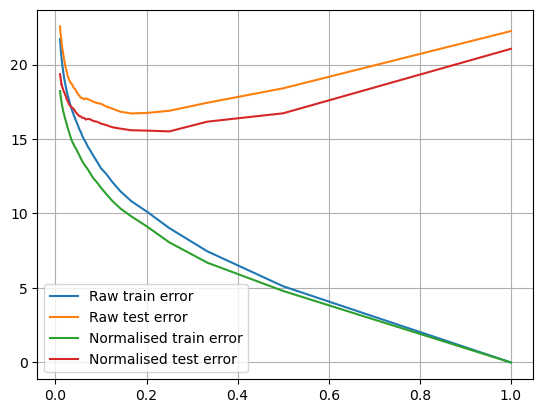

Lowest testing error for KNN (normalized): 15.511121714994774


In [321]:
# plot against 1/k
train_raw.reverse()
test_raw.reverse()

train_norm.reverse()
test_norm.reverse()

k_arr = [1/k for k in range(100, 0, -1)]

plt.plot(k_arr, train_raw)
plt.plot(k_arr, test_raw)

plt.plot(k_arr, train_norm)
plt.plot(k_arr, test_norm)

plt.legend(["Raw train error", "Raw test error", "Normalised train error", "Normalised test error"])

plt.grid()
plt.show()
print("Lowest testing error for KNN (normalized):",min(test_norm))
knn_lowest_error=min(test_norm)

j.  Compare the results of KNN Regression with the linear regression model that has
    the smallest test error and provide your analysis.

Ans:Linear regression: 19.34526424127877, KNN: 15.511121714994774
    KNN performs better in this case because it has a lot of noise. The inflexible or linear regression model trains
    over the complete dataset making it more prone to the noise, where as the KKN classifier only takes in account the k
    neighbours and hence out-performs the LL

2.  For each of parts (a) through (d), indicate whether we would generally
    expect the performance of a flexible statistical learning method to be
    better or worse than an inflexible method. Justify your answer

a. The sample size n is extremely large, and the number of predictors p is small.
Ans: In the cases where adequate data is available, Flexible learning (non-linear) methods will perform better as it        reduces the chances of over-fitting the data.

b. The number of predictors p is extremely large, and the number of observations n is small.
Ans: When sufficient data is not available, inflexible (linaer) models will perform better as using flexible model will     cause over-fitting.

c. The relationship between the predictors and response is highly non-linear.
Ans: In this case, inflexible methods will fail to capture rthe non-linearity of the data. Therefore, we should use         flexible methods

d. The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.
Ans: The Var(E) is high implies the irreducible error is large. In this case a non-linear model will try to improve the     total error by over-fitting the data. Therefore, an inflexible model will perform better here.

3. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1   0 3 0 Red
2   2 0 0 Red
3   0 1 3 Red
4   0 1 2 Green
5   −1 0 1 Green
6   1 1 1 Red

Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [322]:
import math
data = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
for i in range(6):
    print("distance btw ", data[i], " and [0,0,0] is", math.dist(data[i], [0,0,0]))

distance btw  [0, 3, 0]  and [0,0,0] is 3.0
distance btw  [2, 0, 0]  and [0,0,0] is 2.0
distance btw  [0, 1, 3]  and [0,0,0] is 3.1622776601683795
distance btw  [0, 1, 2]  and [0,0,0] is 2.23606797749979
distance btw  [-1, 0, 1]  and [0,0,0] is 1.4142135623730951
distance btw  [1, 1, 1]  and [0,0,0] is 1.7320508075688772


(b) What is our prediction with K = 1? Why?
Ans: For k = 1 we predict the color of [0, 0, 0] as Green. Because [-1, 0, 1] is closest one and its Green.

(c) What is our prediction with K = 3? Why?
Ans: For k = 3 we predict [0,0,0] as Red. Because out of 3, we have 2 nearest samples as red ([1, 1, 1], [2, 0, 0]) and     only one smple as green([-1, 0, 1]).

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be     large or small? Why?

Ans: We will expect the K to be smaller because we will have more wiggly curve when k is very small and we try to fit       each point very closely. With the larger k value the boundary will not be affected by the neighbors and hence will     not be able to capture the non linear nature of data.